<a href="https://colab.research.google.com/github/VidhiSingh11/Mainflow-internship/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv('/content/heart.csv')
df.head()
df.columns.values
df.isna().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


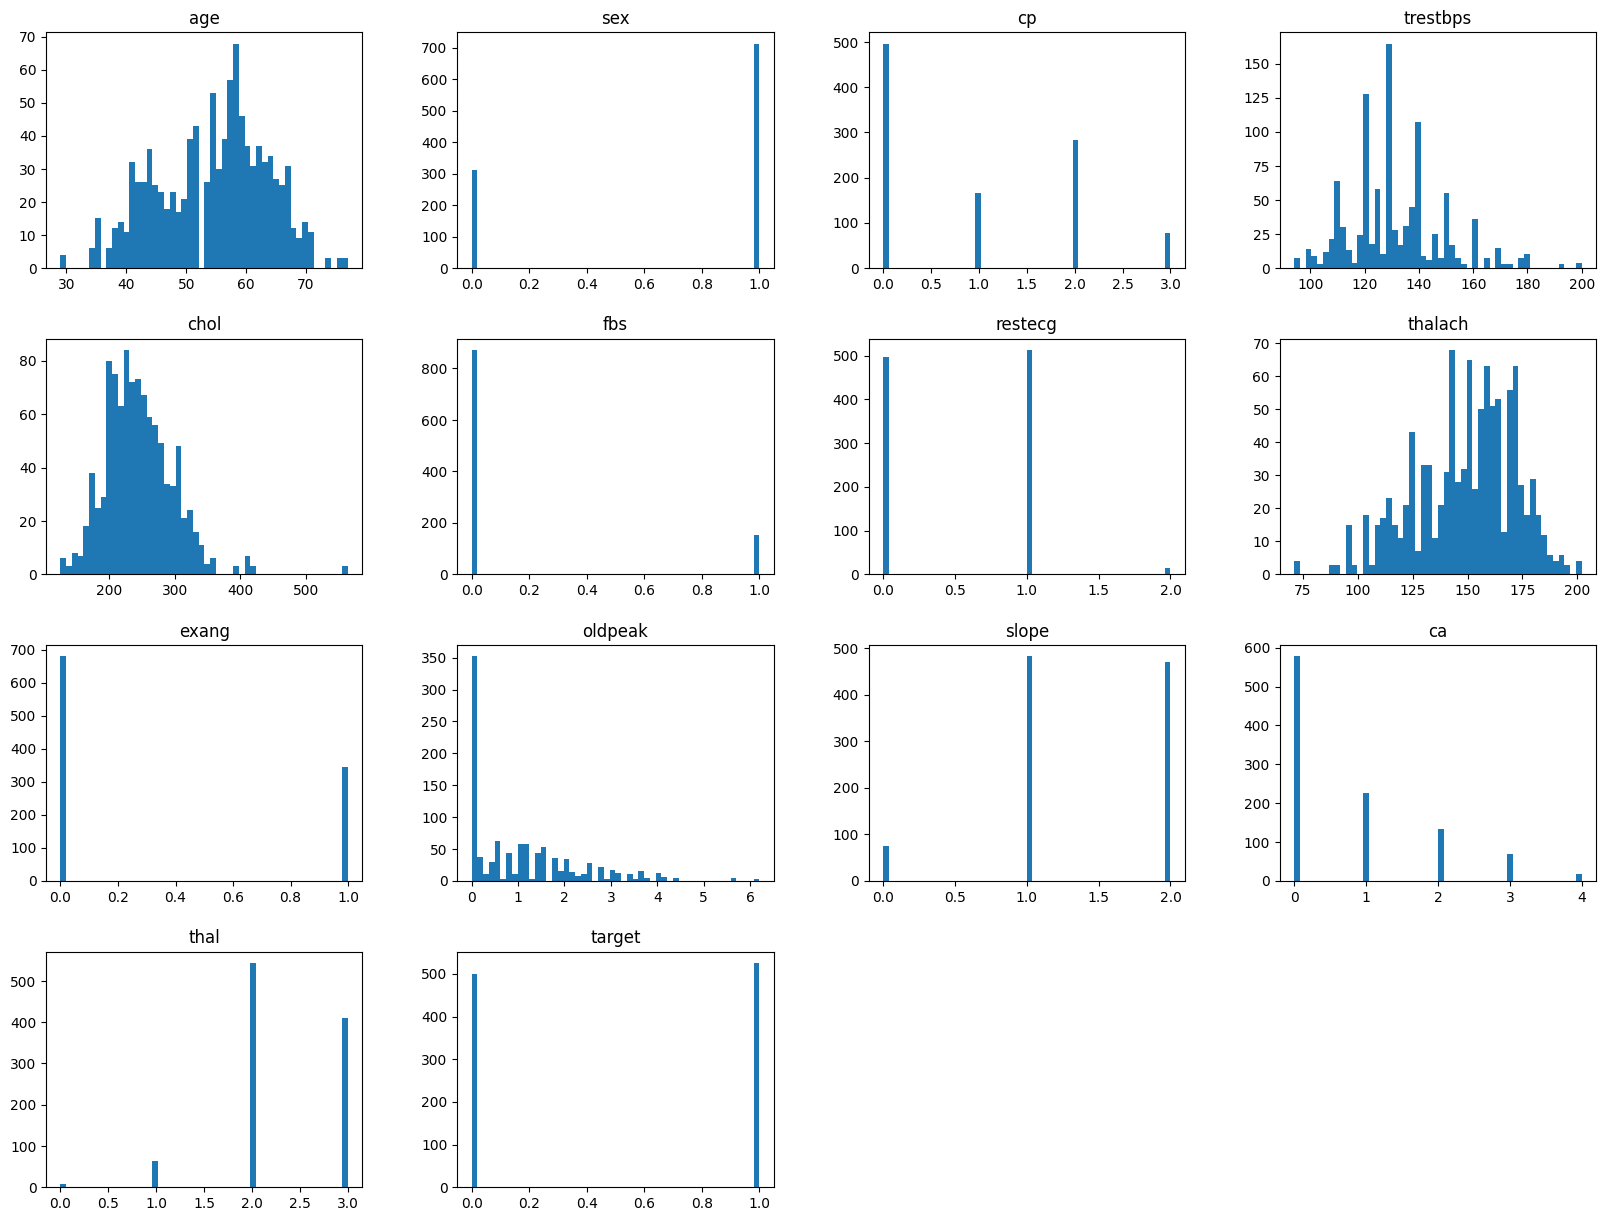

In [36]:
df.hist(bins=50, grid=False, figsize=(20,15));


In [37]:
questions = [
    "How many people have heart disease and how many people don't have heart disease?",
    "People of which sex have the most heart disease?",
    "People of which sex have which type of chest pain most?",
    "People with which chest pain are most prone to have heart disease?"
     "What is the distribution of age among people with heart disease and those without it?",
    "How does cholesterol level vary between people with heart disease and those without?",
    "What is the relationship between maximum heart rate (thalach) and heart disease?"
]

questions


["How many people have heart disease and how many people don't have heart disease?",
 'People of which sex have the most heart disease?',
 'People of which sex have which type of chest pain most?',
 'People with which chest pain are most prone to have heart disease?What is the distribution of age among people with heart disease and those without it?',
 'How does cholesterol level vary between people with heart disease and those without?',
 'What is the relationship between maximum heart rate (thalach) and heart disease?']

In [38]:
#q1
df.target.value_counts()

,count
target,
1,526
0,499


<function matplotlib.pyplot.show(close=None, block=None)>

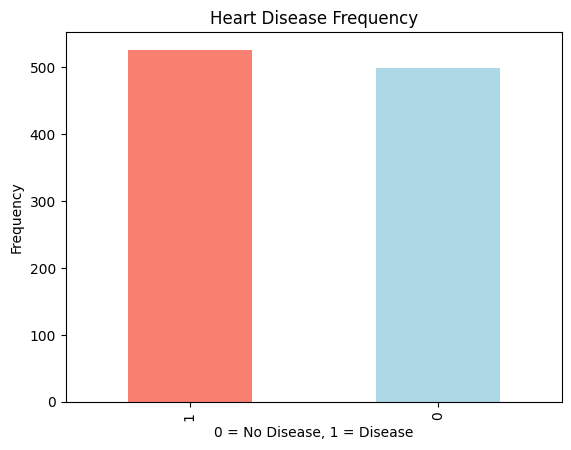

In [39]:
#bar graph
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.show

Text(0.5, 1.0, 'Heart Disease Frequency')

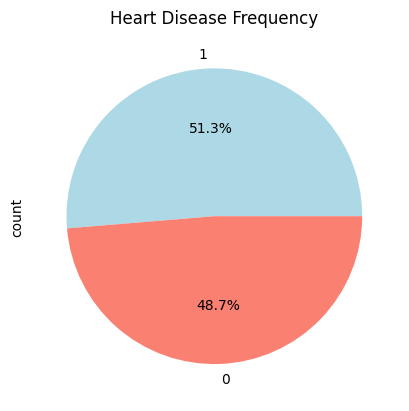

In [40]:
#pie chart
df.target.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Heart Disease Frequency')

<function matplotlib.pyplot.show(close=None, block=None)>

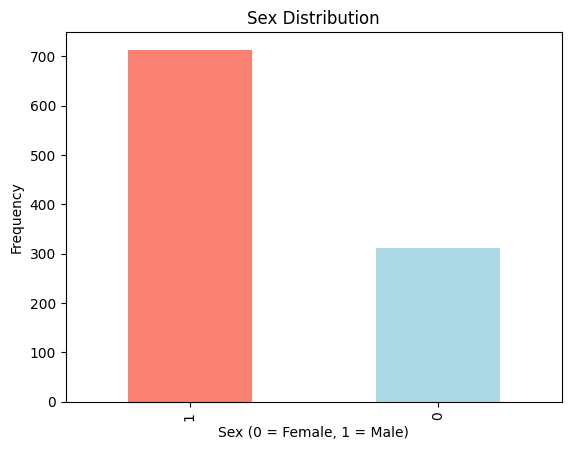

In [41]:
#male and female Dataset Ratio
df.sex.value_counts()
df.sex.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Sex Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show

In [42]:
#q2
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

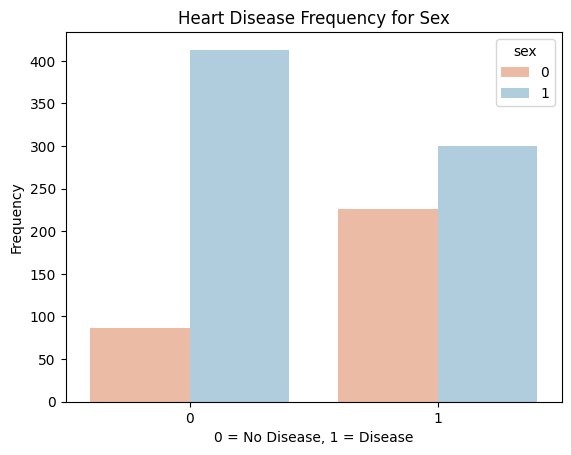

In [43]:
sns.countplot(x='target', hue='sex', data=df, palette='RdBu')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt

In [44]:
#q3
df.cp.value_counts()

,count
cp,
0,497
2,284
1,167
3,77


Text(0.5, 1.0, 'Chest Pain Type VS Count')

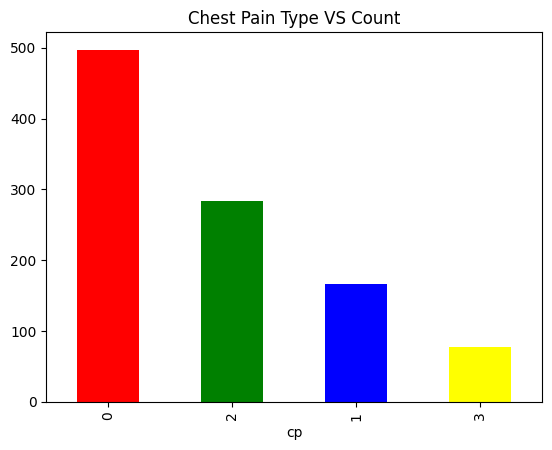

In [45]:
df.cp.value_counts().plot(kind='bar', color=['red','green','blue','yellow'])
plt.title('Chest Pain Type VS Count')


In [46]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


Text(0.5, 0, '0=Female, 1=Male')

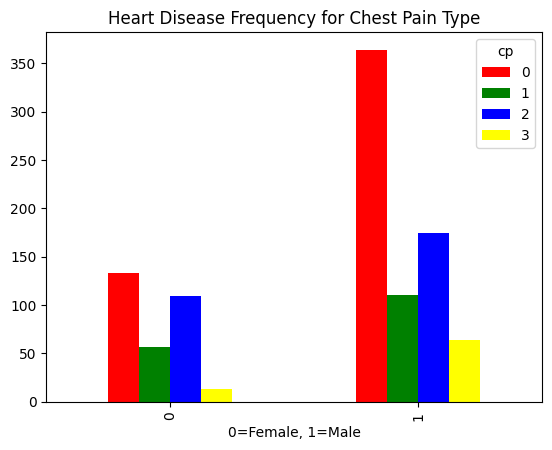

In [47]:
pd.crosstab(df.sex, df.cp).plot(kind='bar', color=['red','green','blue','yellow'])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('0=Female, 1=Male')

In [48]:
#q4
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<Axes: xlabel='cp', ylabel='count'>

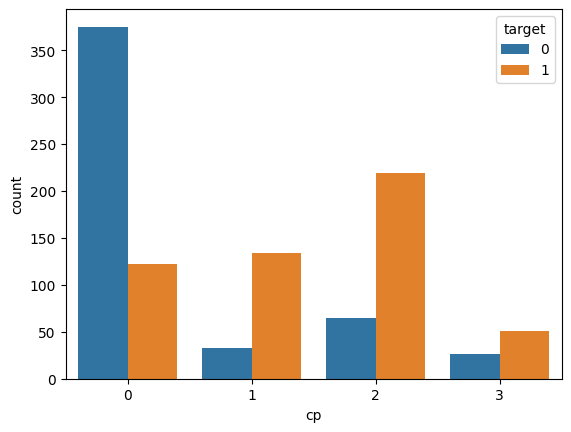

In [49]:
sns.countplot(x='cp', data=df, hue='target')

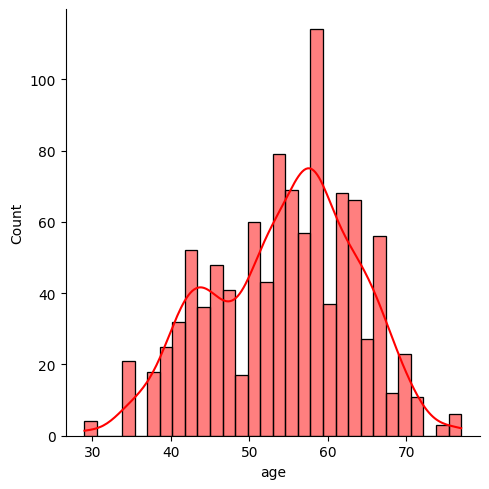

In [50]:
sns.displot(x='age', data=df, bins=30, kde=True, color='r')


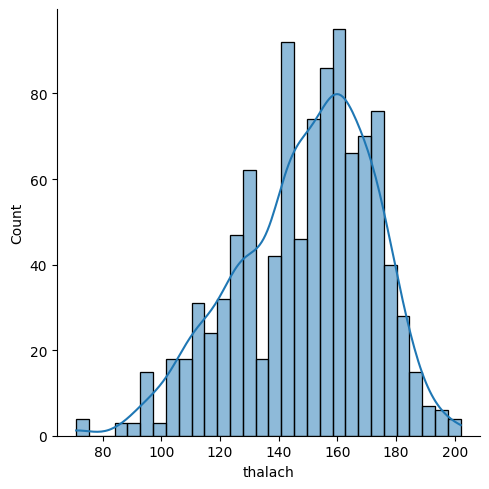

In [51]:
sns.displot(x='thalach', data=df, bins=30, kde=True);

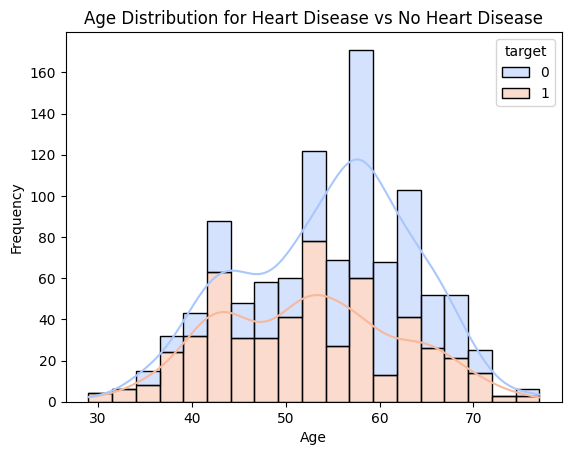

<ipython-input-52-10361592b22d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='coolwarm')


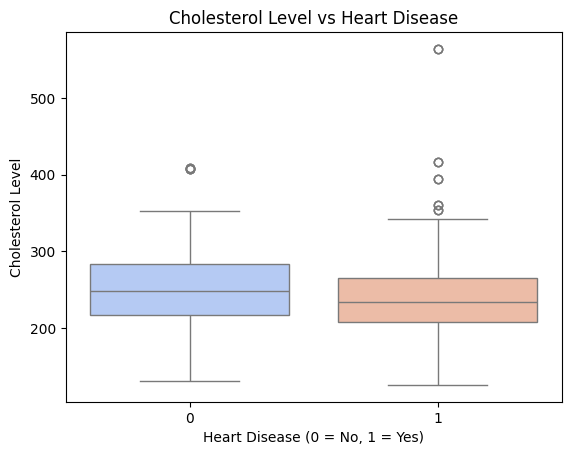

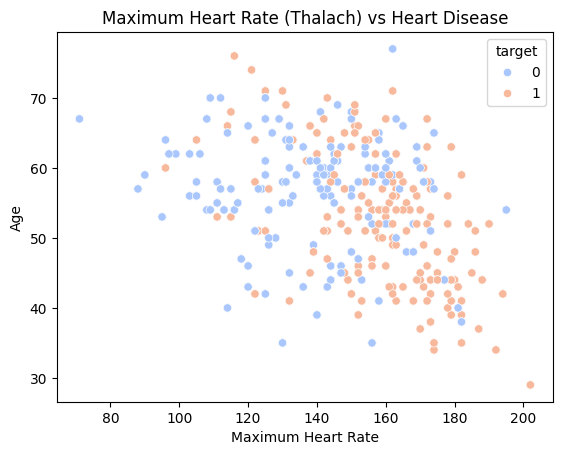

In [52]:
# Q5: Age distribution for heart disease vs no heart disease
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True, palette='coolwarm')
plt.title('Age Distribution for Heart Disease vs No Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Q6: Cholesterol level variation between heart disease vs no heart disease
sns.boxplot(x='target', y='chol', data=df, palette='coolwarm')
plt.title('Cholesterol Level vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

# Q7: Relationship between maximum heart rate (thalach) and heart disease
sns.scatterplot(x='thalach', y='age', hue='target', data=df, palette='coolwarm')
plt.title('Maximum Heart Rate (Thalach) vs Heart Disease')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()